***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$$\mathbf{\text{Testing out steady state conditions for CO Oxidation}}$$<br>
$\mathbf{\text{Date: 09/22}}$<br>
***

In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

%matplotlib notebook

In [2]:
# Disable Printing
def blockPrint():
    sys.__stdout__ = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore Printing
def enablePrint():
    sys.stdout = sys.__stdout__

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [3]:
MKM1 = MKModel('Atomic_1.csv','Stoich_1.csv','Param_1.csv') #Defining the Model

Mass is conserved. 



In [4]:
MKM1.Stoich #prints out the Stoichiometric Matrix Used

,r\S,P_CO,P_O2,P_CO2,theta_CO,theta_O,theta_O2,theta_*
0,r1,-1,0,0,1,0,0,-1
1,r2,0,-1,0,0,0,1,-1
2,r3,0,0,0,0,2,-1,-1
3,r4,0,0,1,-1,-1,0,2


<IPython.core.display.Javascript object>


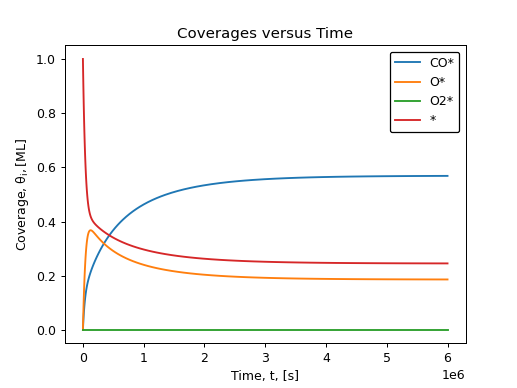

In [5]:
sola,solta= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)

<IPython.core.display.Javascript object>


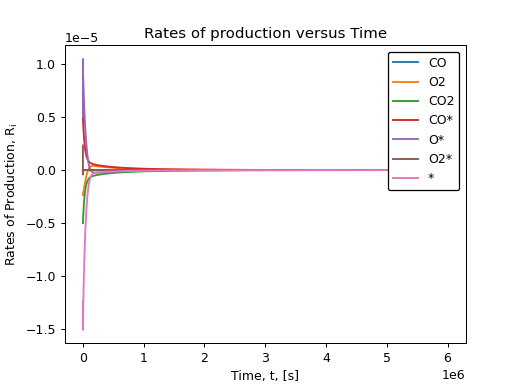

In [6]:
solb,soltb= MKM1.solve_rate_production(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)


In [7]:
#Constant Pressures
P_O2 = 1e-5
P_CO2 = 0#10e-9

### Constant PCO2

In [8]:
%%time
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

# MKM1.k = []
CO_pressure = np.linspace(0,80,25)*1e-6 #Vector of CO_pressures
CO_ss_covg = []
O_ss_covg = []
CO2_ss_rprod = []

blockPrint() #Blocs the corresponding prints of the following code. i.e the status of steady state calculations from being displayed
for i in np.arange(len(CO_pressure)):
    MKM1.set_rxnconditions(Pr=[CO_pressure[i],P_O2,P_CO2]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)  
    CO_ss_covg.append(MKM1.get_SS_coverages()[0]) #Extracting steady state CO Coverage
    O_ss_covg.append(MKM1.get_SS_coverages()[1]) #Extracting steady state O Coverage
    CO2_ss_rprod.append(MKM1.get_SS_rates_production()[2]) #Extracting TOF of CO2

enablePrint() #Re-enables priniting

CPU times: user 56.4 s, sys: 140 ms, total: 56.5 s
Wall time: 56.5 s


<IPython.core.display.Javascript object>


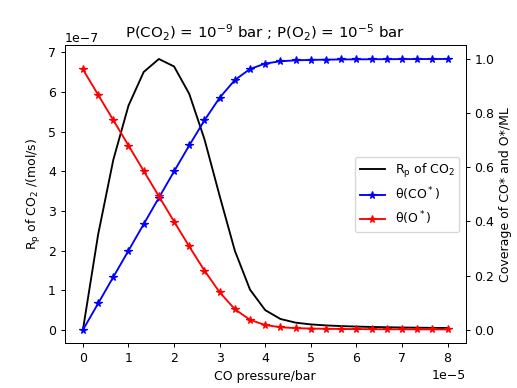

In [9]:
fig,ax = plt.subplots()
lns1 = ax.plot(CO_pressure,CO2_ss_rprod,'k-',label=r'$R_p$ of ${CO}_2$')
ax.set_xlabel('CO pressure/bar')
ax.set_ylabel(r'$R_p$ of $CO_2$ /(mol/s)')
ax.set_title(r'P($CO_2$) = $10^{-9}$ bar ; P($O_2$) = $10^{-5}$ bar')
ax.legend(loc='right')

ax2 = ax.twinx()
lns2 = ax2.plot(CO_pressure,CO_ss_covg,'b*-',label=r'$\theta(CO^*)$')
lns3 = ax2.plot(CO_pressure,O_ss_covg,'r*-',label=r'$\theta(O^*)$')
ax2.set_ylabel('Coverage of CO* and O*/ML')

#For legend purposes:
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='center right')
# ax.set_xscale('log')

plt.show()

### PCO2 varies with PCO

In [10]:
%%time
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

# MKM1.k = []
CO_pressure = np.linspace(0,8,25)*1e-5 #Vector of CO_pressures
CO_ss_covg = []
O_ss_covg = []
CO2_ss_rprod = []

blockPrint() #Blocs the corresponding prints of the following code. i.e the status of steady state calculations from being displayed
for i in np.arange(len(CO_pressure)):
    MKM1.set_rxnconditions(Pr=[CO_pressure[i],P_O2,CO_pressure[i]]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)  
    CO_ss_covg.append(MKM1.get_SS_coverages()[0]) #Extracting steady state CO Coverage
    O_ss_covg.append(MKM1.get_SS_coverages()[1]) #Extracting steady state O Coverage
    CO2_ss_rprod.append(MKM1.get_SS_rates_production()[2]) #Extracting TOF of CO2

enablePrint() #Re-enables priniting

CPU times: user 1min 15s, sys: 224 ms, total: 1min 15s
Wall time: 1min 15s


<IPython.core.display.Javascript object>


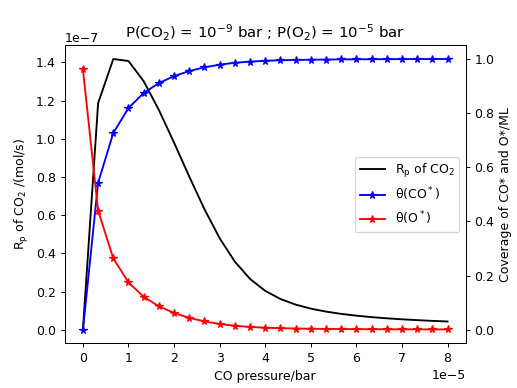

In [11]:
fig,ax = plt.subplots()
lns1 = ax.plot(CO_pressure,CO2_ss_rprod,'k-',label=r'$R_p$ of ${CO}_2$')
ax.set_xlabel('CO pressure/bar')
ax.set_ylabel(r'$R_p$ of $CO_2$ /(mol/s)')
ax.set_title(r'P($CO_2$) = $10^{-9}$ bar ; P($O_2$) = $10^{-5}$ bar')
ax.legend(loc='right')

ax2 = ax.twinx()
lns2 = ax2.plot(CO_pressure,CO_ss_covg,'b*-',label=r'$\theta(CO^*)$')
lns3 = ax2.plot(CO_pressure,O_ss_covg,'r*-',label=r'$\theta(O^*)$')
ax2.set_ylabel('Coverage of CO* and O*/ML')

#For legend purposes:
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='center right')

plt.show()

### PCO2 varies with PCO+PO2

In [12]:
%%time
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_limits_of_integration(Ti=0,Tf=6e6)#Sets the reange of time used in integration

# MKM1.k = []
CO_pressure = np.linspace(0,8,25)*1e-5 #Vector of CO_pressures
CO_ss_covg = []
O_ss_covg = []
CO2_ss_rprod = []

blockPrint() #Blocs the corresponding prints of the following code. i.e the status of steady state calculations from being displayed
for i in np.arange(len(CO_pressure)):
    MKM1.set_rxnconditions(Pr=[CO_pressure[i],P_O2,CO_pressure[i]+P_O2]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)  
    CO_ss_covg.append(MKM1.get_SS_coverages()[0]) #Extracting steady state CO Coverage
    O_ss_covg.append(MKM1.get_SS_coverages()[1]) #Extracting steady state O Coverage
    CO2_ss_rprod.append(MKM1.get_SS_rates_production()[2]) #Extracting TOF of CO2

enablePrint() #Re-enables priniting

CPU times: user 1min 18s, sys: 240 ms, total: 1min 18s
Wall time: 1min 18s


<IPython.core.display.Javascript object>


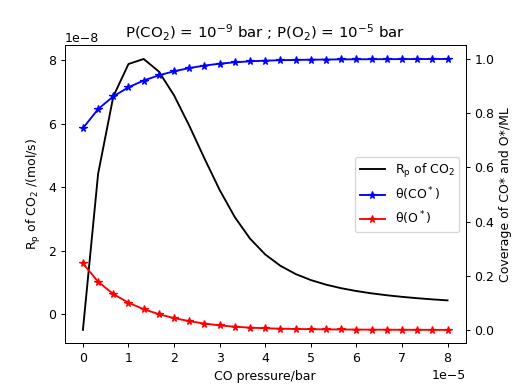

In [13]:
fig,ax = plt.subplots()
lns1 = ax.plot(CO_pressure,CO2_ss_rprod,'k-',label=r'$R_p$ of ${CO}_2$')
ax.set_xlabel('CO pressure/bar')
ax.set_ylabel(r'$R_p$ of $CO_2$ /(mol/s)')
ax.set_title(r'P($CO_2$) = $10^{-9}$ bar ; P($O_2$) = $10^{-5}$ bar')
ax.legend(loc='right')

ax2 = ax.twinx()
lns2 = ax2.plot(CO_pressure,CO_ss_covg,'b*-',label=r'$\theta(CO^*)$')
lns3 = ax2.plot(CO_pressure,O_ss_covg,'r*-',label=r'$\theta(O^*)$')
ax2.set_ylabel('Coverage of CO* and O*/ML')

#For legend purposes:
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='center right')

plt.show()